### New inserted code to read in the variables from the exported .csv file

In [2]:
source('scripts/load_libraries.R')
source('scripts/meg_utility_functions.R')

In [1]:
file <- read.csv(paste(getwd(), "/metagenome_analysis_vars.csv", sep = ""),
                 colClasses = "character",
                 header = FALSE,
                 col.names = c("V1", "V2", "V3","V4"))

sample_column_id              <- file[1,2]
graph_output_dir              <- file[2,2]
stats_output_dir              <- file[3,2]
amr_count_matrix_filepath     <- file[4,2]
amr_metadata_filepath         <- file[5,2]
megares_annotation_filename   <- file[6,2]
biom_file                     <- file[7,2]
tre_file                      <- file[8,2]
tax_fasta                     <- file[9,2]
taxa_file                     <- file[10,2]
microbiome_temp_metadata_file <- file[11,2]

# Creates a list of all the AMR variables, and is dependent on the number inputed in the previous script
AMR_exploratory_analyses <- list()
for (i in 1:(which(file$V1 == "microbiome_exploratory_analyses") - 13)){
  subset_list = eval(parse(text=file[(12+i),2]))
  AMR_exploratory_analyses <- append(AMR_exploratory_analyses, 
                                     list(list(name = file[(12+i),1],
                                               subsets = subset_list,
                                               exploratory_var = file[(12+i),3],
                                               order = file[(12+i),4])))
}


y <- which(file$V1 == "microbiome_exploratory_analyses")
microbiome_exploratory_analyses <- list()
for (i in 1:(nrow(file) - y)){
  subset_list = eval(parse(text=file[(y+i),2]))
  microbiome_exploratory_analyses <- append(microbiome_exploratory_analyses, 
                                     list(list(name = file[(y+i),1],
                                               subsets = subset_list,
                                               exploratory_var = file[(y+i),3],
                                               order = file[(y+i),4])))
}

# This is for the ZIG model, don't worry to much about this for now

In [3]:

# Each analyses you wish to perform should have its own list in the following
# statistical_analyses list.  A template is provided to get you started.
# Multiple analyses, subsets, and contrasts are valid, but only one random
# effect can be used per analysis.  The contrasts of interest must have their
# parent variable in the model matrix equation.  Contrasts are named by
# parent variable then child variable without a space inbetween, for example:
# PVar1Cvar1 where the model matrix equation is ~ 0 + Pvar1.
AMR_statistical_analyses = list(
  # Analysis 1
  # Description: 
  list(
    name = 'Treatment',
    subsets = list(),
    model_matrix = '~ 0 + Treatment ',
    contrasts = list('TreatmentCONV - TreatmentRWA'),
    random_effect = NA
  )
)

microbiome_statistical_analyses = list(
  # Analysis 1
  # Description: 
  list(
    name = 'Treatment',
    subsets = list(),
    model_matrix = '~ 0 + Treatment ',
    contrasts = list('TreatmentCONV - TreatmentRWA'),
    random_effect = NA
  )
)


# This part is important for us to improve. STOP HERE
## Right now, we have to manually select which scripts to be run based on the analysis you need
* All of the objects above wil get used by the scripts we run below



Some things to work on:
* I'm getting a warning now due to some changes in other packages. It would be great if we could update the code to work with the new syntax
* Make drop down list where users can select which combination of analyses they need:
 * AMR/16S qiime2 results/kraken2 results
 

In [4]:
####### END OF USER CONTROLS ######

## Pick the correct script that handles resistome data and/or microbiome data.
#### If shotgun microbiome and megares analysis, run:
#source('scripts/metagenomeSeq_megares_kraken.R')

#### If 16S microbiome and megares analysis, run:
source('scripts/metagenomeSeq_megares_qiime.R')

[1] "No AMR features removed"
[1] "No microbiome features removed"


Default value being used.

Default value being used.

Default value being used.

Default value being used.



# Now, you can print exploratory figures to your local directory. 

This part takes a long time, but creates relative abundance barplots, diversity barplots, NMDS, PCA, and heatmaps. 
For now it's commented out because the NMDS function creates a bunch of messages that look ugly. We can probably find a way to fix this though. 

Other little things:
* I want to add better functionality to the functions in the "scripts/meg_utility_functions.R" file where we can better handle cases with factors > 20 in length

In [5]:
######## THEN print figures #

# After running this script, these are the useful objects that contain all the data aggregated to different levels
# The metagenomeSeq objects are contained in these lists "AMR_analytic_data" and "microbiome_analytic_data"
# Melted counts are contained in these data.table objects "amr_melted_analytic" "microbiome_melted_analytic"

## Run code to make some exploratory figures, zero inflated gaussian model, and output count matrices.
suppressMessages(source('scripts/print_figures.R'))

Run 0 stress 0.05258235 
Run 1 stress 0.05258271 
... Procrustes: rmse 0.0002291912  max resid 0.0009165584 
... Similar to previous best
Run 2 stress 0.05258358 
... Procrustes: rmse 0.0003992181  max resid 0.001557986 
... Similar to previous best
Run 3 stress 0.05258353 
... Procrustes: rmse 0.0004104419  max resid 0.001638902 
... Similar to previous best
Run 4 stress 0.1034003 
Run 5 stress 0.05258313 
... Procrustes: rmse 0.0002277827  max resid 0.0005505954 
... Similar to previous best
Run 6 stress 0.05258329 
... Procrustes: rmse 0.0003688847  max resid 0.001476958 
... Similar to previous best
Run 7 stress 0.05258392 
... Procrustes: rmse 0.0004633142  max resid 0.001770362 
... Similar to previous best
Run 8 stress 0.05258398 
... Procrustes: rmse 0.0004720184  max resid 0.001799141 
... Similar to previous best
Run 9 stress 0.05258256 
... Procrustes: rmse 0.0001975437  max resid 0.0007936574 
... Similar to previous best
Run 10 stress 0.1023276 
Run 11 stress 0.05258305 
.

Run 9 stress 0.09517728 
Run 10 stress 0.09643503 
Run 11 stress 0.106993 
Run 12 stress 0.1276009 
Run 13 stress 0.1264438 
Run 14 stress 0.1069913 
Run 15 stress 0.09534745 
Run 16 stress 0.1276012 
Run 17 stress 0.1329245 
Run 18 stress 0.1950703 
Run 19 stress 0.1285508 
Run 20 stress 0.09588163 
Run 21 stress 0.1510334 
Run 22 stress 0.1247677 
Run 23 stress 0.1048429 
Run 24 stress 0.1285448 
Run 25 stress 0.1298962 
Run 26 stress 0.09161323 
... New best solution
... Procrustes: rmse 0.007826008  max resid 0.03412569 
Run 27 stress 0.09522169 
Run 28 stress 0.1066767 
Run 29 stress 0.1269043 
Run 30 stress 0.1263461 
Run 31 stress 0.09517738 
Run 32 stress 0.09161328 
... Procrustes: rmse 8.097839e-05  max resid 0.0003334577 
... Similar to previous best
*** Solution reached
Run 0 stress 0.1003299 
Run 1 stress 0.1191596 
Run 2 stress 0.2043739 
Run 3 stress 0.09892371 
... New best solution
... Procrustes: rmse 0.0186736  max resid 0.09373247 
Run 4 stress 0.1042203 
Run 5 stre

Run 4 stress 0.05258343 
... Procrustes: rmse 0.0003705851  max resid 0.001474477 
... Similar to previous best
Run 5 stress 0.05258293 
... Procrustes: rmse 0.0002690554  max resid 0.001048715 
... Similar to previous best
Run 6 stress 0.05258323 
... Procrustes: rmse 0.0003400221  max resid 0.001110071 
... Similar to previous best
Run 7 stress 0.1047493 
Run 8 stress 0.05258379 
... Procrustes: rmse 0.0004431917  max resid 0.001693908 
... Similar to previous best
Run 9 stress 0.103081 
Run 10 stress 0.05258263 
... Procrustes: rmse 0.0001733723  max resid 0.000687204 
... Similar to previous best
Run 11 stress 0.1017145 
Run 12 stress 0.05258391 
... Procrustes: rmse 0.0004473557  max resid 0.001422625 
... Similar to previous best
Run 13 stress 0.05258371 
... Procrustes: rmse 0.0004214135  max resid 0.001492673 
... Similar to previous best
Run 14 stress 0.05258249 
... Procrustes: rmse 0.0001524077  max resid 0.0006063857 
... Similar to previous best
Run 15 stress 0.05258277 
.

Run 20 stress 0.1479179 
Run 21 stress 0.1076609 
... Procrustes: rmse 0.003568095  max resid 0.01452011 
Run 22 stress 0.1188181 
Run 23 stress 0.1185727 
Run 24 stress 0.1185727 
Run 25 stress 0.1075501 
... New best solution
... Procrustes: rmse 0.0001129104  max resid 0.0005456126 
... Similar to previous best
*** Solution reached
Run 0 stress 0.09534696 
Run 1 stress 0.1106806 
Run 2 stress 0.09161345 
... New best solution
... Procrustes: rmse 0.02425254  max resid 0.115908 
Run 3 stress 0.09573126 
Run 4 stress 0.1067814 
Run 5 stress 0.1279762 
Run 6 stress 0.1263045 
Run 7 stress 0.1121242 
Run 8 stress 0.09576826 
Run 9 stress 0.09517743 
Run 10 stress 0.1045635 
Run 11 stress 0.126922 
Run 12 stress 0.104841 
Run 13 stress 0.09161325 
... New best solution
... Procrustes: rmse 0.0001939242  max resid 0.0008457893 
... Similar to previous best
Run 14 stress 0.1111584 
Run 15 stress 0.09573123 
Run 16 stress 0.1244827 
Run 17 stress 0.09643486 
Run 18 stress 0.09470464 
Run 19

Run 3 stress 0.1525385 
Run 4 stress 0.1321553 
Run 5 stress 0.1781377 
Run 6 stress 0.1686007 
Run 7 stress 0.1685919 
Run 8 stress 0.1295764 
... New best solution
... Procrustes: rmse 0.0001916977  max resid 0.0004818028 
... Similar to previous best
Run 9 stress 0.1321552 
Run 10 stress 0.1321563 
Run 11 stress 0.1321555 
Run 12 stress 0.160335 
Run 13 stress 0.1321552 
Run 14 stress 0.132156 
Run 15 stress 0.168431 
Run 16 stress 0.1321552 
Run 17 stress 0.1295786 
... Procrustes: rmse 0.002052852  max resid 0.005381454 
... Similar to previous best
Run 18 stress 0.1321552 
Run 19 stress 0.1321551 
Run 20 stress 0.1295779 
... Procrustes: rmse 0.0006496328  max resid 0.001560371 
... Similar to previous best
*** Solution reached
Run 0 stress 0.1162814 
Run 1 stress 0.1211732 
Run 2 stress 0.1162812 
... New best solution
... Procrustes: rmse 0.0004293264  max resid 0.001210554 
... Similar to previous best
Run 3 stress 0.121175 
Run 4 stress 0.1201279 
Run 5 stress 0.1153075 
... 

Run 20 stress 0.1750593 
*** Solution reached
Run 0 stress 0.1603353 
Run 1 stress 0.1295761 
... New best solution
... Procrustes: rmse 0.1514894  max resid 0.3072575 
Run 2 stress 0.1295781 
... Procrustes: rmse 0.0009072199  max resid 0.00215655 
... Similar to previous best
Run 3 stress 0.1655066 
Run 4 stress 0.1321551 
Run 5 stress 0.1729929 
Run 6 stress 0.1295793 
... Procrustes: rmse 0.00122623  max resid 0.002928043 
... Similar to previous best
Run 7 stress 0.1684305 
Run 8 stress 0.1791898 
Run 9 stress 0.1811963 
Run 10 stress 0.129578 
... Procrustes: rmse 0.0008980891  max resid 0.002134894 
... Similar to previous best
Run 11 stress 0.1295779 
... Procrustes: rmse 0.000850445  max resid 0.002034831 
... Similar to previous best
Run 12 stress 0.1699868 
Run 13 stress 0.1603344 
Run 14 stress 0.165505 
Run 15 stress 0.1321553 
Run 16 stress 0.1295774 
... Procrustes: rmse 0.0006989494  max resid 0.00165645 
... Similar to previous best
Run 17 stress 0.1788366 
Run 18 stre

Run 12 stress 0.1470319 
Run 13 stress 0.05386683 
... Procrustes: rmse 0.0006257589  max resid 0.002171924 
... Similar to previous best
Run 14 stress 0.05386667 
... Procrustes: rmse 0.000596781  max resid 0.002079143 
... Similar to previous best
Run 15 stress 0.05595149 
Run 16 stress 0.05386637 
... New best solution
... Procrustes: rmse 0.0004067243  max resid 0.001412407 
... Similar to previous best
Run 17 stress 0.05595124 
Run 18 stress 0.1428178 
Run 19 stress 0.1834627 
Run 20 stress 0.05386648 
... Procrustes: rmse 8.859521e-05  max resid 0.0003078396 
... Similar to previous best
*** Solution reached
Run 0 stress 0.1603353 
Run 1 stress 0.1750324 
Run 2 stress 0.1321552 
... New best solution
... Procrustes: rmse 0.09050296  max resid 0.3316346 
Run 3 stress 0.1525388 
Run 4 stress 0.1525384 
Run 5 stress 0.2615345 
Run 6 stress 0.1295769 
... New best solution
... Procrustes: rmse 0.1293844  max resid 0.2828377 
Run 7 stress 0.1295794 
... Procrustes: rmse 0.002421998  m

Run 5 stress 0.1428211 
Run 6 stress 0.05386765 
... Procrustes: rmse 0.0008431181  max resid 0.002927632 
... Similar to previous best
Run 7 stress 0.05386752 
... Procrustes: rmse 0.0006657002  max resid 0.002306298 
... Similar to previous best
Run 8 stress 0.1470323 
Run 9 stress 0.142819 
Run 10 stress 0.05386661 
... New best solution
... Procrustes: rmse 0.000569734  max resid 0.001983619 
... Similar to previous best
Run 11 stress 0.1454195 
Run 12 stress 0.1653803 
Run 13 stress 0.05386632 
... New best solution
... Procrustes: rmse 0.0003095312  max resid 0.001079419 
... Similar to previous best
Run 14 stress 0.1949981 
Run 15 stress 0.05386655 
... Procrustes: rmse 0.000138232  max resid 0.0004543705 
... Similar to previous best
Run 16 stress 0.15571 
Run 17 stress 0.0538671 
... Procrustes: rmse 0.0004811115  max resid 0.001673425 
... Similar to previous best
Run 18 stress 0.1765641 
Run 19 stress 0.1800863 
Run 20 stress 0.05386731 
... Procrustes: rmse 0.0005255922  ma

# Everything after this is where we can get creative to summarize our results. For now, let's focus on streamlining how we use everything above
## Here, we can have an area to show them how to play around with ggplot2
    
### The main objects to use are
* AMR
  * amr_melted_analytic/amr_raw_melted_analytic
   * Object of all counts in long form
  * AMR_analytic_data
   * List of MRexperiment objects at each level; Class, Mechanism, Group, Gene
* Microbiome
  * microbiome_melted_analytic/microbiome_raw_melted_analytic
  * microbiome_analytic_data

    First, combine the normalized count tables with the metadata file.

In [6]:
head(amr_melted_analytic)

Level_ID,Name,ID,Normalized_Count
Class,betalactams,FC.199A1in2_concatenated,2967.2131
Class,Tetracyclines,FC.199A1in2_concatenated,15000.0000
Class,Multi-drug resistance,FC.199A1in2_concatenated,3377.0492
Class,Aminoglycosides,FC.199A1in2_concatenated,557.3770
Class,Bacitracin,FC.199A1in2_concatenated,0.0000
Class,MLS,FC.199A1in2_concatenated,131.1475


In [7]:
### Start of code for figures, combine table objects to include meta
setkey(amr_melted_raw_analytic,ID) 
setkey(amr_melted_analytic,ID) 

setkey(microbiome_melted_analytic,ID)
# Set keys for both metadata files
setkey(metadata,ID)
setkey(microbiome_metadata,ID)
microbiome_melted_analytic <- microbiome_melted_analytic[microbiome_metadata]
amr_melted_raw_analytic <- amr_melted_raw_analytic[metadata]
amr_melted_analytic <- amr_melted_analytic[metadata]

In [8]:
head(amr_melted_analytic)

Level_ID,Name,ID,Normalized_Count,rn,sample,City,Treatment,Dilution,Packaging,...,nonhost_filtered_reads,amrplusplus_counts,Samdedup_amrplusplus_counts,deduped_SNP_confirmed_counts,resistome_raw_mapped_reads,resistome_CSS_counts,AMR_class_Richness,AMR_class_Shannon,AMR_mech_Richness,AMR_mech_Shannon
Class,betalactams,FC.112A1in2_concatenated,1427.0833,FC.112A1in2_concatenated,FC_112,Fort Collins,RWA,Half,Vacuum,...,5538,82,60,673,668,6958.333,10,1.701165,18,2.167576
Class,Tetracyclines,FC.112A1in2_concatenated,2750.0000,FC.112A1in2_concatenated,FC_112,Fort Collins,RWA,Half,Vacuum,...,5538,82,60,673,668,6958.333,10,1.701165,18,2.167576
Class,Multi-drug resistance,FC.112A1in2_concatenated,520.8333,FC.112A1in2_concatenated,FC_112,Fort Collins,RWA,Half,Vacuum,...,5538,82,60,673,668,6958.333,10,1.701165,18,2.167576
Class,Aminoglycosides,FC.112A1in2_concatenated,1187.5000,FC.112A1in2_concatenated,FC_112,Fort Collins,RWA,Half,Vacuum,...,5538,82,60,673,668,6958.333,10,1.701165,18,2.167576
Class,Bacitracin,FC.112A1in2_concatenated,62.5000,FC.112A1in2_concatenated,FC_112,Fort Collins,RWA,Half,Vacuum,...,5538,82,60,673,668,6958.333,10,1.701165,18,2.167576
Class,MLS,FC.112A1in2_concatenated,239.5833,FC.112A1in2_concatenated,FC_112,Fort Collins,RWA,Half,Vacuum,...,5538,82,60,673,668,6958.333,10,1.701165,18,2.167576


# Create plots below

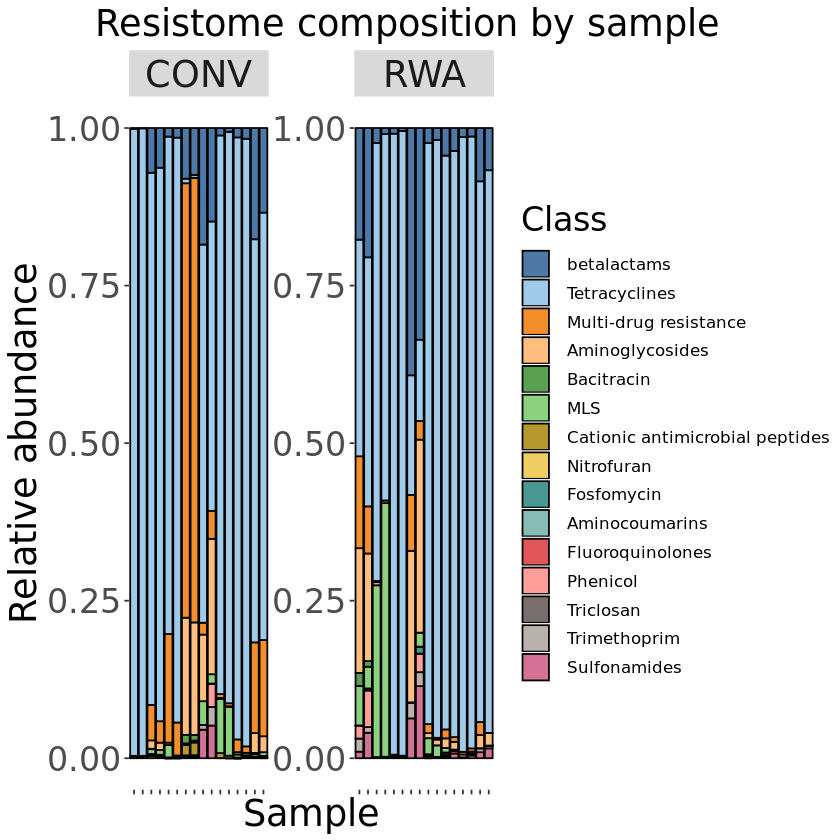

In [9]:
## Figure 1 showing resistome composition
AMR_class_sum <- amr_melted_analytic[Level_ID=="Class", .(sum_class= sum(Normalized_Count)),by=.(ID, Name, Packaging, Treatment)][order(-Packaging )]
AMR_class_sum[,total:= sum(sum_class), by=.(ID)]
AMR_class_sum[,percentage:= sum_class/total ,by=.(ID, Name) ]
AMR_class_sum$Class <- AMR_class_sum$Name
fig1 <- ggplot(AMR_class_sum, aes(x = ID, y = percentage, fill = Class)) + 
  geom_bar(stat = "identity",colour = "black")+
  facet_wrap( ~ Treatment, scales='free',ncol = 2) +
  #scale_fill_brewer(palette="Dark2") +
  theme(
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(),
    strip.text.x=element_text(size=22),
    strip.text.y=element_text(size=22, angle=0),
    axis.text.x=element_blank(), #element_text(size=16, angle=20, hjust=1)
    axis.text.y=element_text(size=20),
    axis.title=element_text(size=22),
    legend.position="right",
    panel.spacing=unit(0.1, "lines"),
    plot.title=element_text(size=22, hjust=0.5),
    legend.text=element_text(size=10),
    legend.title=element_text(size=20),
    panel.background = element_rect(fill = "white")
  ) +
  ggtitle("\t\tResistome composition by sample") +
  xlab('Sample') +
  ylab('Relative abundance') +
  scale_fill_tableau("Tableau 20") 
fig1